# BINARY FLOW
In this section, we'll analyze the data a la many publications for psychophysiology.

We'll basically say 'we induced flow' because we picked a good flow intervention, and we'll use our survey
data to simply corroborate that we succeeded.  We can train a model to separate 'flow' from 'not flow' during these tasks.

We can trust people's distinction ('flow' vs 'not flow') OR the FSS.  FSS is standard, but frought when making a judgement (9 axis).

To do this best, we should (1) train on the binary indication of people. and (2) train on the FSS score and perform a logistic regression after.

In [39]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib widget

In [63]:
FOLDER = '/Volumes/Secondary/PhDStudy_Results'

def getFSS(s):
    return (s['FSS1'] + s['FSS2'] + s['FSS3'] + s['FSS4'] + s['FSS5'] + s['FSS6'] + s['FSS7'] + s['FSS8'] + s['FSS9'])/9.0

flow_ratings = []
FSS = []
for user in range(1,26):
    try:
        with open(FOLDER + '/P' + str(user) + '_Processed.pickle', 'rb') as handle:
            print('\n' + str(user))
            session_data, entrance, exit = pickle.load(handle)
            try:
                flow_ratings.append(exit['flow'])
                print(f'{flow_ratings[-1]}', end='')
            except:
                pass    
            try:
                FSS.append(getFSS(exit))
                print(f'({FSS[-1]:.1f})', end=' ')
            except:
                pass
                
            for session in session_data:
                try:
                    for k in session['surveys']:
                        try:
                            flow_ratings.append(session['surveys'][k]['flow'])
                            print(session['surveys'][k]['flow'], end='')
                        except:
                            pass
                        try:
                            FSS.append(getFSS(session['surveys'][k]))
                            print(f'({FSS[-1]:.1f})', end=' ')
                        except:
                            pass
                except:
                    pass
    except:
        pass

# 21 people.  13 had a session where they did not experience flow.
# 


1
true(4.9) true(4.3) true(5.9) 
2
Y(4.2) false(4.7) true(5.9) false(3.8) true(5.2) 
3
true(5.2) true(5.8) true(6.0) true(6.0) 
5
Y(6.2) true(5.1) true(5.4) true(5.7) true(5.9) 
6
false(4.2) false(4.3) true(5.2) true(6.2) 
7
true(4.3) true(5.1) true(5.8) false(4.6) 
9
Y(5.3) false(4.3) false(6.2) true(5.4) true(5.4) 
11
true(5.7) true(6.8) true(5.8) false(4.1) 
12
nan(nan) true(3.4) true(3.8) false(3.4) true(3.9) 
13
Y(5.4) true(5.6) true(6.7) true(5.2) true(4.4) 
15
Y(5.1) true(4.4) true(5.3) true(4.2) true(5.3) 
16
Y(6.0) true(6.3) true(6.1) false(4.9) true(6.6) 
17
Y(5.2) true(4.7) true(6.2) true(4.0) true(6.1) 
18
Y(6.1) false(3.8) true(5.6) true(5.0) true(5.9) 
19
Y(5.7) true(3.8) true(6.4) false(4.8) true(6.3) 
20
Y(5.0) false(3.2) true(6.1) false(3.7) true(6.4) 
21
Y(5.8) true(6.4) true(5.8) true(6.1) false(5.4) 
22
Y(6.2) true(4.8) true(6.6) true(4.7) true(6.2) 
23
Y(5.7) true(5.6) false(3.9) true(5.7) 
24
Y(5.2) true(6.4) true(6.4) true(5.4) 
25
true(6.1) false(6.3) true(5.2)

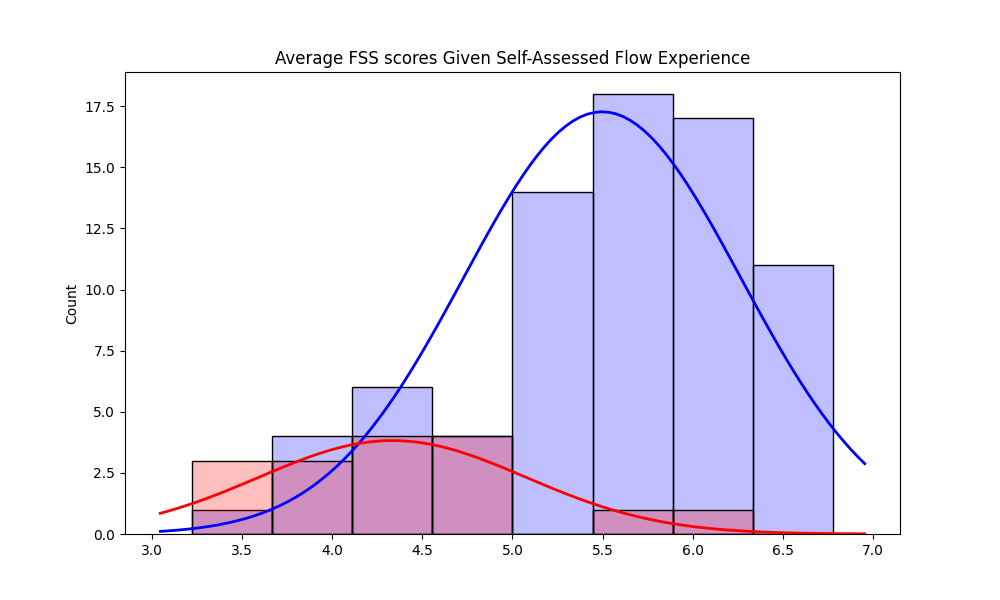

In [64]:
def getFSS(s):
    return (s['FSS1'] + s['FSS2'] + s['FSS3'] + s['FSS4'] + s['FSS5'] + s['FSS6'] + s['FSS7'] + s['FSS8'] + s['FSS9'])/9.0


FSS_true, FSS_false = [], []

for user in range(1,25):
    try:
        with open(FOLDER + '/P' + str(user) + '_Processed.pickle', 'rb') as handle:
            session_data, entrance, exit = pickle.load(handle)
            try:
                if (exit['flow'] in ['false', 'N']):
                    FSS_false.append(getFSS(exit))
                else:
                    FSS_true.append(getFSS(exit))
            except:
                pass    
          
            for session in session_data:
                try:
                    for k in session['surveys']:
                        try:
                            if (session['surveys'][k]['flow'] in ['false', 'N']):
                                FSS_false.append(getFSS(session['surveys'][k]))
                            else:
                                FSS_true.append(getFSS(session['surveys'][k]))
                        except:
                            pass
                except:
                    pass
    except:
        pass

'''
# Add noise
y_true = np.abs(0.002+ np.random.normal(0, 0.008, len(FSS_true)))
y_false = np.abs(0.002+ np.random.normal(0, 0.008, len(FSS_false)))

# Plot the data
plt.figure(figsize=(10,6))
sns.scatterplot(x=FSS_true, y=y_true, color='blue', label='self-assessed flow', alpha=0.7)
sns.scatterplot(x=FSS_false, y=y_false, color='red', label='self-assessed lack of flow', alpha=0.7)

# Fit and plot a Gaussian
mu_true, std_true = np.nanmean(FSS_true), np.nanstd(FSS_true)
mu_false, std_false = np.nanmean(FSS_false), np.nanstd(FSS_false)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p_true = norm.pdf(x, mu_true, std_true)
p_false = norm.pdf(x, mu_false, std_false)

plt.plot(x, p_true, 'b', linewidth=2)
plt.plot(x, p_false, 'r', linewidth=2)

plt.title('Average FSS scores Given Self-Assessed Flow Experience')
plt.ylim(0, 1)  # Adjust y-axis limits
plt.show()
'''

# Remove NaN values
FSS_true = np.array(FSS_true)
FSS_false = np.array(FSS_false)
FSS_true = FSS_true[~np.isnan(FSS_true)]
FSS_false = FSS_false[~np.isnan(FSS_false)]

# Add noise
y_true = np.abs(np.random.normal(0, 0.05, len(FSS_true)))
y_false = np.abs(np.random.normal(0, 0.05, len(FSS_false)))

# Plot the data
plt.figure(figsize=(10,6))

# Determine common bin edges for both histograms
bins = np.histogram(np.hstack((FSS_true, FSS_false)), bins='auto')[1]

sns.histplot(FSS_true, color='blue', label='self-assessed flow', bins=bins, alpha=0.25)
sns.histplot(FSS_false, color='red', label='self-assessed lack of flow', bins=bins, alpha=0.25)

# Fit and plot a Gaussian
mu_true, std_true = np.nanmean(FSS_true), np.nanstd(FSS_true)
mu_false, std_false = np.nanmean(FSS_false), np.nanstd(FSS_false)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p_true = norm.pdf(x, mu_true, std_true)
p_false = norm.pdf(x, mu_false, std_false)

# The height of the Gaussian curve should be scaled to match the histogram
scale_true = len(FSS_true) * np.diff(bins)[0]
scale_false = len(FSS_false) * np.diff(bins)[0]

plt.plot(x, p_true*scale_true, 'b', linewidth=2)
plt.plot(x, p_false*scale_false, 'r', linewidth=2)

plt.title('Average FSS scores Given Self-Assessed Flow Experience')
plt.show()

In [66]:
print(f"{flow_ratings.count('true') + flow_ratings.count('Y')} sessions of self-assessed flow.")
print(f"{flow_ratings.count('false') + flow_ratings.count('N')} sessions of self-assessed lack of flow.")
print('-'*10)
print(f"13 people reported 'not flow', 8 reported flow always.")
print("29 'not flow' sessions and 66 'flow' sessions if we take 5.0 as our cutoff.")

78 sessions of self-assessed flow.
17 sessions of self-assessed lack of flow.
----------
13 people reported 'not flow', 8 reported flow always.
29 'not flow' sessions and 66 'flow' sessions if we take 5.0 as our cutoff.


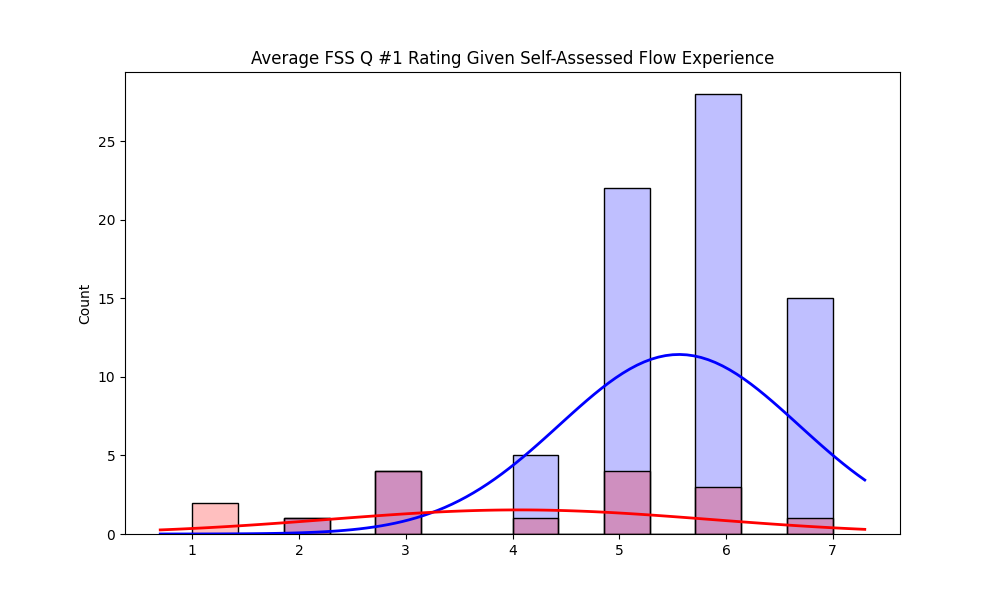

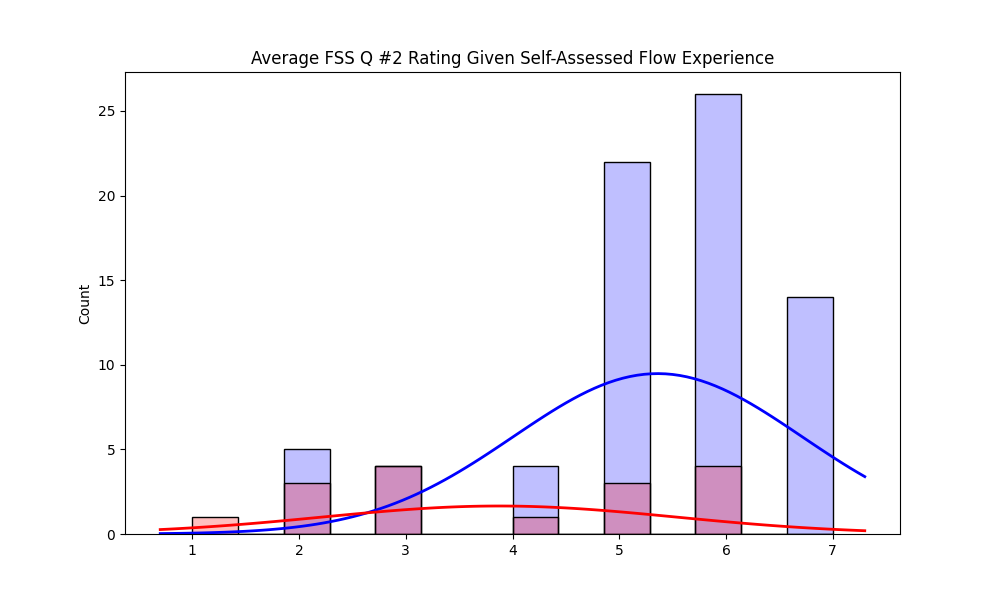

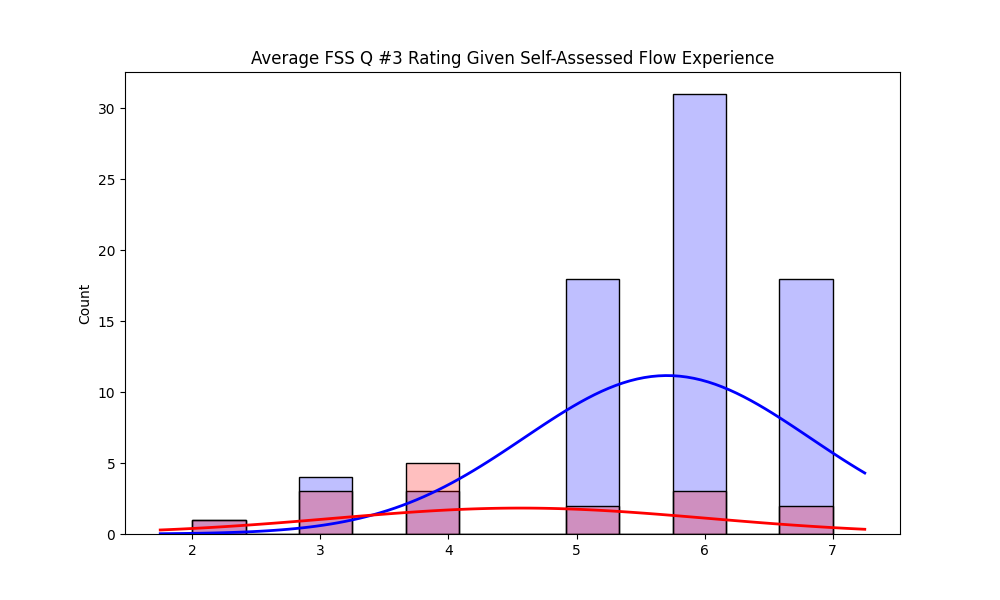

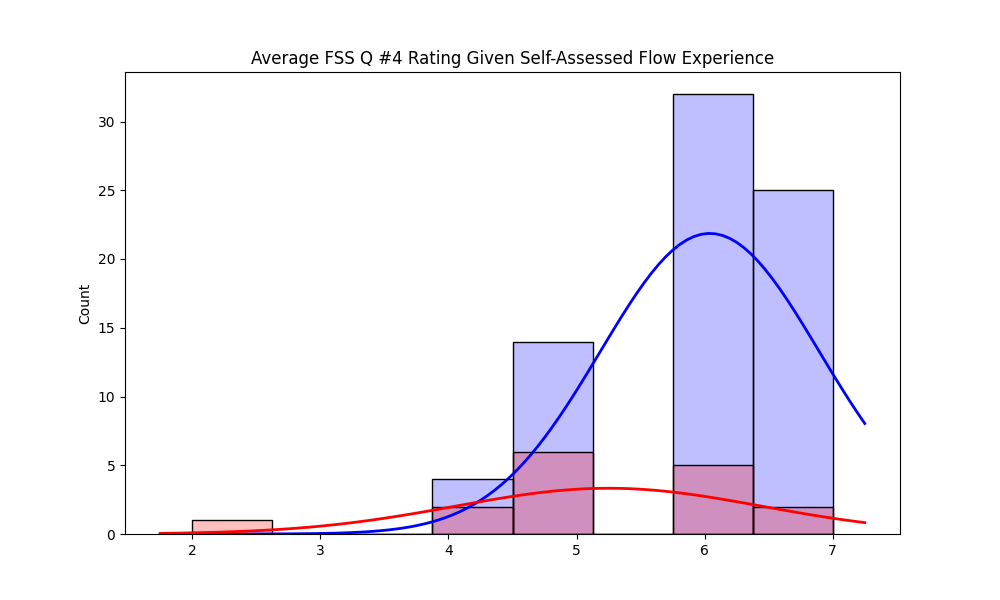

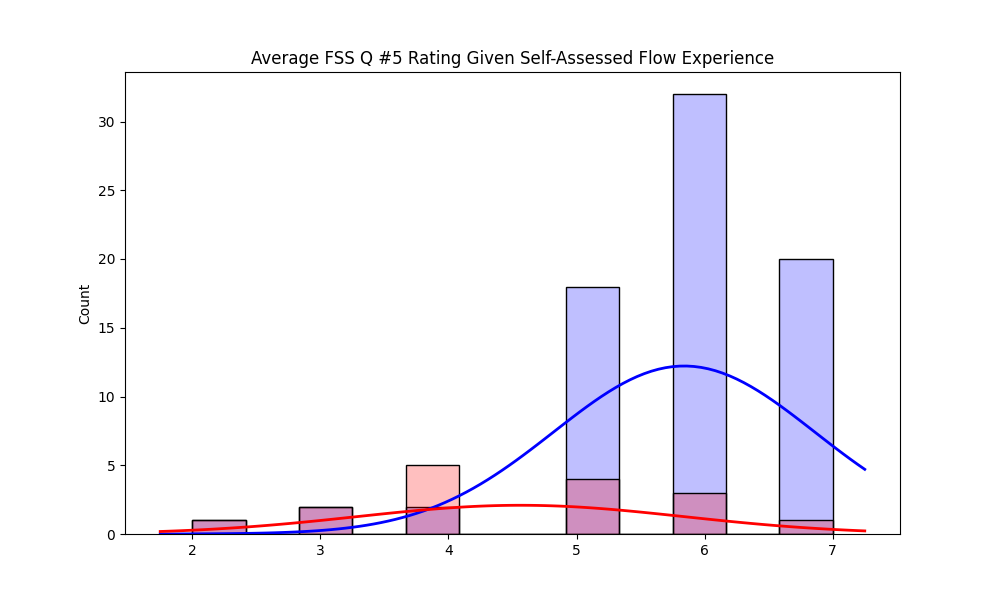

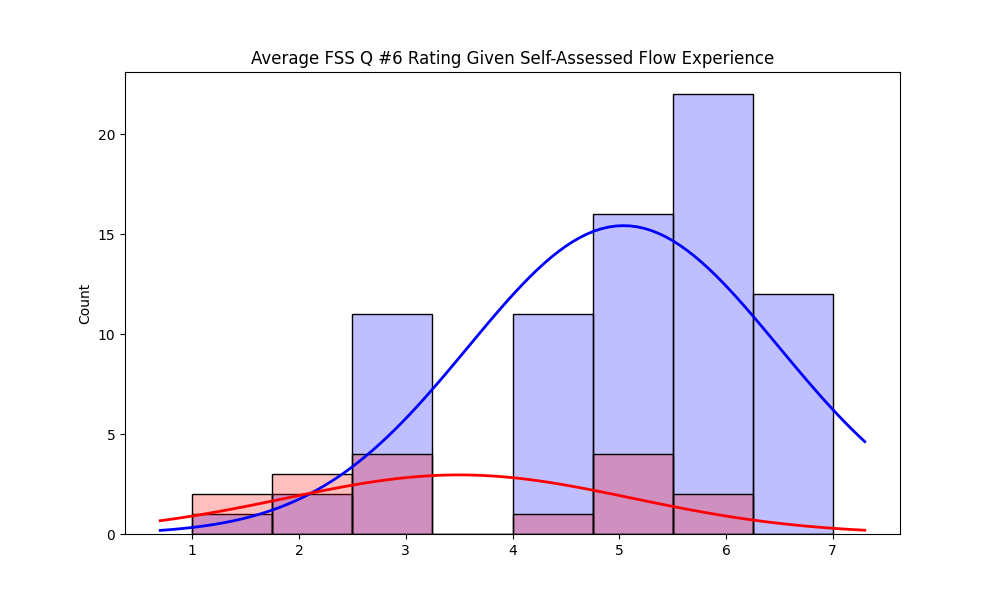

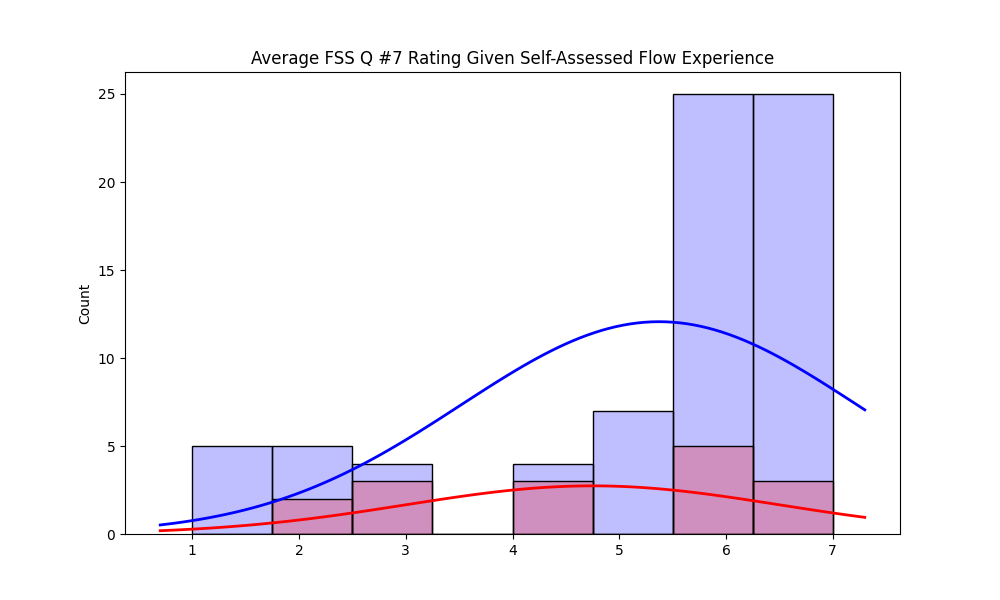

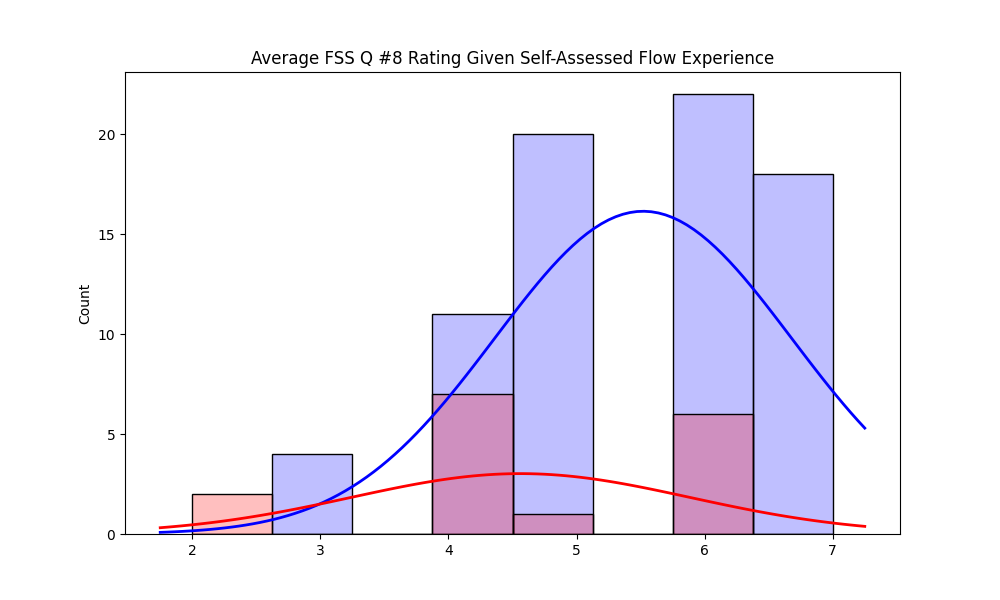

In [67]:
def plotFSSResponseVsSelfAssessedFlow(FSSNum): #1-9
    FSS_true, FSS_false = [], []
    for user in range(1,25):
        try:
            with open(FOLDER + '/P' + str(user) + '_Processed.pickle', 'rb') as handle:
                session_data, entrance, exit = pickle.load(handle)
                try:
                    if (exit['flow'] in ['false', 'N']):
                        FSS_false.append(exit['FSS' + str(FSSNum)])
                    else:
                        FSS_true.append(exit['FSS' + str(FSSNum)])
                except:
                    pass    
              
                for session in session_data:
                    try:
                        for k in session['surveys']:
                            try:
                                if (session['surveys'][k]['flow'] in ['false', 'N']):
                                    FSS_false.append(session['surveys'][k]['FSS' + str(FSSNum)])
                                else:
                                    FSS_true.append(session['surveys'][k]['FSS' + str(FSSNum)])
                            except:
                                pass
                    except:
                        pass
        except:
            pass
    
    
    # Remove NaN values
    FSS_true = np.array(FSS_true)
    FSS_false = np.array(FSS_false)
    FSS_true = FSS_true[~np.isnan(FSS_true)]
    FSS_false = FSS_false[~np.isnan(FSS_false)]
    
    # Add noise
    y_true = np.abs(np.random.normal(0, 0.05, len(FSS_true)))
    y_false = np.abs(np.random.normal(0, 0.05, len(FSS_false)))
    
    # Plot the data
    plt.figure(figsize=(10,6))
    
    # Determine common bin edges for both histograms
    bins = np.histogram(np.hstack((FSS_true, FSS_false)), bins='auto')[1]
    
    sns.histplot(FSS_true, color='blue', label='self-assessed flow', bins=bins, alpha=0.25)
    sns.histplot(FSS_false, color='red', label='self-assessed lack of flow', bins=bins, alpha=0.25)
    
    # Fit and plot a Gaussian
    mu_true, std_true = np.nanmean(FSS_true), np.nanstd(FSS_true)
    mu_false, std_false = np.nanmean(FSS_false), np.nanstd(FSS_false)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    p_true = norm.pdf(x, mu_true, std_true)
    p_false = norm.pdf(x, mu_false, std_false)
    
    # The height of the Gaussian curve should be scaled to match the histogram
    scale_true = len(FSS_true) * np.diff(bins)[0]
    scale_false = len(FSS_false) * np.diff(bins)[0]
    
    plt.plot(x, p_true*scale_true, 'b', linewidth=2)
    plt.plot(x, p_false*scale_false, 'r', linewidth=2)

    plt.title(f'Average FSS Q #{FSSNum} Rating Given Self-Assessed Flow Experience')
    plt.show()

for FSSNum in range(1,9):
    plotFSSResponseVsSelfAssessedFlow(FSSNum)